### Early Prediction of Motor Insurance Cost Using FNOL Data Project

### 1. IMPORT NECESSARIES LIBRERIE

In [1]:
import pandas as pd             # For data manipulation
import numpy as np              # For numerical computation
import seaborn as sns           # For data visualization
import matplotlib.pyplot as plt # For data visualization

### 2. DATA COLECTION

##### For this project, we will use three datasets, which will be loaded separately as shown below.

In [2]:
# Load data Claim dataset
data_claims = pd.read_csv("claims.csv")

In [3]:
# Let Verify the Claims dataset
data_claims.head(2)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,Status
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,Minor,2020-03-01,settled
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,Minor,2019-03-23,settled


In [4]:
# Claims data format 
data_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Claim_ID                8000 non-null   object 
 1   Policy_ID               8000 non-null   object 
 2   Accident_Date           8000 non-null   object 
 3   FNOL_Date               8000 non-null   object 
 4   Claim_Type              8000 non-null   object 
 5   Claim_Complexity        8000 non-null   object 
 6   Fraud_Flag              8000 non-null   bool   
 7   Litigation_Flag         8000 non-null   bool   
 8   Estimated_Claim_Amount  8000 non-null   int64  
 9   Ultimate_Claim_Amount   7575 non-null   float64
 10  Severity_Band           8000 non-null   object 
 11  Settlement_Date         7575 non-null   object 
 12  Status                  8000 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 703.3+ KB


In [5]:
# Load data policyholders
data_policyholders = pd.read_csv("policyholders.csv")

In [6]:
# Data Policyholders confirmation
data_policyholders.head(3)

,Policy_ID,Customer_ID,Age_of_Driver,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band
0,POL10000,CUST20000,56,Female,Retired,Newcastle,7552,36,Sedan,10,Fair
1,POL10001,CUST20001,53,Female,Unemployed,Bristol,13275,31,Motorcycle,11,Poor
2,POL10002,CUST20002,19,Female,Unemployed,London,12967,0,Sedan,9,Excellent


In [7]:
# Data format verification
data_policyholders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Policy_ID                 5000 non-null   object
 1   Customer_ID               5000 non-null   object
 2   Age_of_Driver             5000 non-null   int64 
 3   Gender                    5000 non-null   object
 4   Occupation                5000 non-null   object
 5   Region                    5000 non-null   object
 6   Annual_Mileage            5000 non-null   int64 
 7   Driving_Experience_Years  5000 non-null   int64 
 8   Vehicle_Type              5000 non-null   object
 9   Vehicle_Age               5000 non-null   int64 
 10  Credit_Score_Band         5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [8]:
#Load data third parties
data_third_parties = pd.read_csv("third_parties.csv")

In [9]:
# Data data_third_parties confirmation
data_third_parties.head()

,Claim_ID,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,TP40000,Pedestrian,Minor
1,CLM30002,TP40001,Passenger,Minor
2,CLM30007,TP40002,Pedestrian,Minor
3,CLM30012,TP40003,Pedestrian,Minor
4,CLM30015,TP40004,Driver,Minor


In [10]:
# Data format verification
data_third_parties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim_ID            2410 non-null   object
 1   TP_ID               2410 non-null   object
 2   ThirdParty_Role     2410 non-null   object
 3   TP_Injury_Severity  2410 non-null   object
dtypes: object(4)
memory usage: 75.4+ KB


#### Data Colection Observation


    We are working with three datasets, each containing distinct and valuable information: the Claims table, the Policy table, and the Third-Party table.

    The Claims and Policy tables can be reliably joined using **Policy_ID** as the primary key. The Third-Party table does not contain a direct policy identifier and therefore can only be linked to the other datasets using **Claim_ID**.

    To ensure that all claim records are preserved and no data is inadvertently excluded, left joins will be used throughout the merging process. Any missing values resulting from these joins will be addressed during the subsequent data-cleaning phase.


#### Let Joint the table 

In [11]:
# 1. Join Claims + Policy (left join)
claims_with_policy = data_claims.merge(
    data_policyholders,
    on="Policy_ID",
    how="left"
)

# 2. Join the above with Third-Party table (left join)
final_df = claims_with_policy.merge(
   data_third_parties,
    on="Claim_ID",
    how="left"
)

In [12]:
# Joint table confirmation
final_df.head()

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,NaN,NaN
2,CLM30002,POL13575,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,...,Unemployed,Newcastle,10793,0,SUV,5,Excellent,TP40001,Passenger,Minor
3,CLM30003,POL10138,2021-06-18,2021-06-18,Weather,Low,False,False,2812,1450.0,...,Employed,Newcastle,9405,5,Hatchback,13,Good,NaN,NaN,NaN
4,CLM30004,POL12316,2021-03-21,2021-03-24,Theft,Low,False,False,5094,4243.0,...,Unemployed,Leeds,16729,9,Hatchback,12,Excellent,NaN,NaN,NaN


In [13]:
# Let call our dataset data instead of final_df
data = final_df

In [14]:
data.head(2)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,NaN,NaN


### EDA - EXPLORATORY DATA ANALYSE

### 3. DATA CLEANING

In [15]:
# Let check the data format , Adjust if necessary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_ID                  8413 non-null   object 
 1   Policy_ID                 8413 non-null   object 
 2   Accident_Date             8413 non-null   object 
 3   FNOL_Date                 8413 non-null   object 
 4   Claim_Type                8413 non-null   object 
 5   Claim_Complexity          8413 non-null   object 
 6   Fraud_Flag                8413 non-null   bool   
 7   Litigation_Flag           8413 non-null   bool   
 8   Estimated_Claim_Amount    8413 non-null   int64  
 9   Ultimate_Claim_Amount     7968 non-null   float64
 10  Severity_Band             8413 non-null   object 
 11  Settlement_Date           7968 non-null   object 
 12  Status                    8413 non-null   object 
 13  Customer_ID               8413 non-null   object 
 14  Age_of_D

#### Data Cleaning Observation

- The combined dataset contains 8,413 rows and 26 columns, with a notable number of missing values resulting from the table joins.
- The Accident_Date column should be converted to a datetime data type.
- The FNOL_Date column should also be converted to a datetime data type.
- Several columns contain missing values, which will be examined and addressed in detail during the subsequent data exploration and cleaning phase.

#### Let Convert the date columns to correct data type

In [16]:
data["Accident_Date"] = pd.to_datetime(data["Accident_Date"])     # convert from object to datatime
data["FNOL_Date"] = pd.to_datetime(data["FNOL_Date"])             # convert from object to datatime
data["Settlement_Date"] = pd.to_datetime(data["Settlement_Date"]) # convert from object to datatime

In [17]:
# Data type confirmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Claim_ID                  8413 non-null   object        
 1   Policy_ID                 8413 non-null   object        
 2   Accident_Date             8413 non-null   datetime64[ns]
 3   FNOL_Date                 8413 non-null   datetime64[ns]
 4   Claim_Type                8413 non-null   object        
 5   Claim_Complexity          8413 non-null   object        
 6   Fraud_Flag                8413 non-null   bool          
 7   Litigation_Flag           8413 non-null   bool          
 8   Estimated_Claim_Amount    8413 non-null   int64         
 9   Ultimate_Claim_Amount     7968 non-null   float64       
 10  Severity_Band             8413 non-null   object        
 11  Settlement_Date           7968 non-null   datetime64[ns]
 12  Status              

#### Let Handle Missing value

In [18]:
# Let check missing values columns
data.isnull().sum()

Claim_ID                       0
Policy_ID                      0
Accident_Date                  0
FNOL_Date                      0
Claim_Type                     0
Claim_Complexity               0
Fraud_Flag                     0
Litigation_Flag                0
Estimated_Claim_Amount         0
Ultimate_Claim_Amount        445
Severity_Band                  0
Settlement_Date              445
Status                         0
Customer_ID                    0
Age_of_Driver                  0
Gender                         0
Occupation                     0
Region                         0
Annual_Mileage                 0
Driving_Experience_Years       0
Vehicle_Type                   0
Vehicle_Age                    0
Credit_Score_Band              0
TP_ID                       6003
ThirdParty_Role             6003
TP_Injury_Severity          6003
dtype: int64

#### Missing Value Observation

- The dataset contains (5) five columns with missing values, each requiring a different treatment based on business context.
  
- Ultimate_Claim_Amount: Missing values are associated with claims that are not yet settled. was filled with median to evoid outlier.
  
- Settlement_Date: Missing values indicate unsettled claims and was filled with mode.

-TP_ID: As this column is purely an identifier and does not add analytical value,will be droped.

- ThirdParty_Role: Missing values will be explicitly labeled as “No_Third_Party” to indicate the absence of third-party involvement.
- 
-TP_Injury_Severity: Missing values will also be labeled as “No_Third_Party”, ensuring consistency and preserving business meaning.

In [19]:
# Handle Missing values
data["Ultimate_Claim_Amount"] = data["Ultimate_Claim_Amount"].fillna(data["Ultimate_Claim_Amount"].median())
data["Settlement_Date"] = data["Settlement_Date"].fillna(data["Settlement_Date"].mode()[0])
data["ThirdParty_Role"] = data["ThirdParty_Role"].fillna("No_thirdparty")
data["TP_Injury_Severity"] = data["TP_Injury_Severity"].fillna("No_thirdparty")


In [20]:
# Data missing value confirmation
data.isnull().sum()

Claim_ID                       0
Policy_ID                      0
Accident_Date                  0
FNOL_Date                      0
Claim_Type                     0
Claim_Complexity               0
Fraud_Flag                     0
Litigation_Flag                0
Estimated_Claim_Amount         0
Ultimate_Claim_Amount          0
Severity_Band                  0
Settlement_Date                0
Status                         0
Customer_ID                    0
Age_of_Driver                  0
Gender                         0
Occupation                     0
Region                         0
Annual_Mileage                 0
Driving_Experience_Years       0
Vehicle_Type                   0
Vehicle_Age                    0
Credit_Score_Band              0
TP_ID                       6003
ThirdParty_Role                0
TP_Injury_Severity             0
dtype: int64

### 4 FEATURE ENGINIEERING

#### Let check Categorical incocistency

In [21]:
data.head(3)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,No_thirdparty,No_thirdparty
2,CLM30002,POL13575,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,...,Unemployed,Newcastle,10793,0,SUV,5,Excellent,TP40001,Passenger,Minor


In [22]:
# Categorical data inconsistency verification
data['Claim_Type'].value_counts()

Claim_Type
Collision    4614
Weather      1274
Theft         851
Vandalism     807
Fire          444
Other         423
Name: count, dtype: int64

In [23]:
# Categorical data inconsistency verification
data['Claim_Complexity'].value_counts()

Claim_Complexity
Low       5870
Medium    1876
High       667
Name: count, dtype: int64

In [24]:
# Categorical data inconsistency verification
data['Fraud_Flag'].value_counts()

Fraud_Flag
False    7993
True      420
Name: count, dtype: int64

In [25]:
# Categorical data inconsistency verification
data['Litigation_Flag'].value_counts()

Litigation_Flag
False    7557
True      856
Name: count, dtype: int64

In [26]:
# Categorical data inconsistency verification
data['Region'].value_counts()

Region
Glasgow       946
Liverpool     866
London        860
Bristol       855
Edinburgh     849
Newcastle     836
Manchester    825
Cardiff       811
Leeds         787
Birmingham    778
Name: count, dtype: int64

In [27]:
# Categorical data inconsistency verification
data['Vehicle_Type'].value_counts()

Vehicle_Type
Sedan         2605
Hatchback     1971
SUV           1776
Coupe          891
Van            751
Motorcycle     419
Name: count, dtype: int64

In [28]:
# Categorical data inconsistency verification
data['Credit_Score_Band'].value_counts()

Credit_Score_Band
Good         3458
Excellent    2546
Fair         1605
Poor          804
Name: count, dtype: int64

In [29]:
# Categorical data inconsistency verification
data['ThirdParty_Role'].value_counts()

ThirdParty_Role
No_thirdparty    6003
Passenger         836
Pedestrian        797
Driver            777
Name: count, dtype: int64

In [30]:
# Categorical data inconsistency verification
data['TP_Injury_Severity'].value_counts()

TP_Injury_Severity
No_thirdparty    6003
Minor            2050
Serious           342
Fatal              18
Name: count, dtype: int64

In [31]:
data.head(1)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor


#### Drop irrelevant columns

In [32]:
# List of irrelevant or non-analytical columns
cols_to_drop = [
    "Claim_ID",
    "Policy_ID",
    "Customer_ID",
    "TP_ID"
]

# Drop columns
data = data.drop(columns=cols_to_drop)

#### Colum Inconsistency Observation

    - Based on our observations, no inconsistencies were identified in the categorical data.
    - To ensure all patterns and potential issues are fully captured, we will proceed with visualizing the data.

#### Let Visualize the categorical data

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


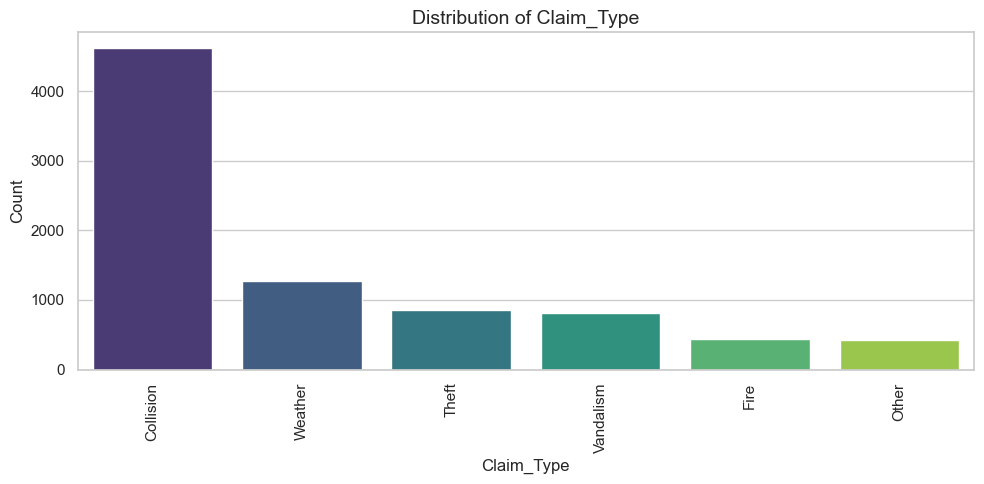

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


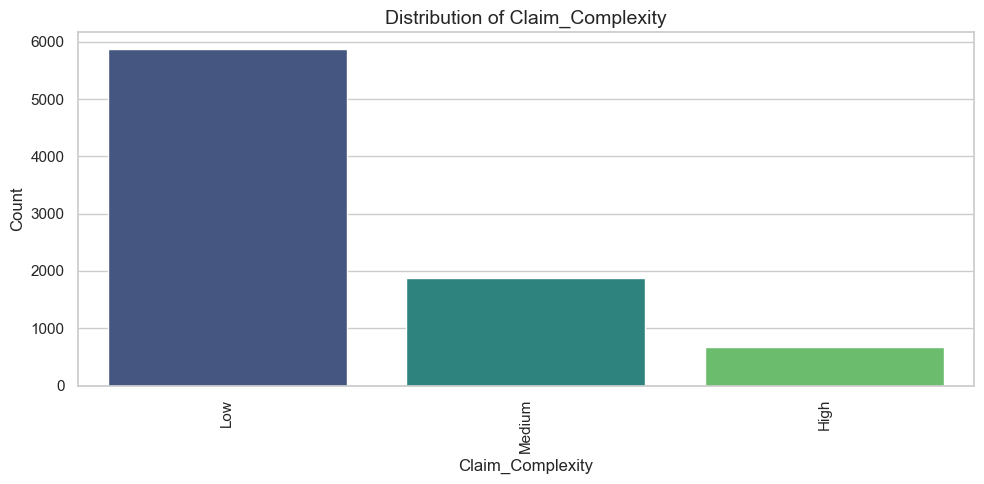

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


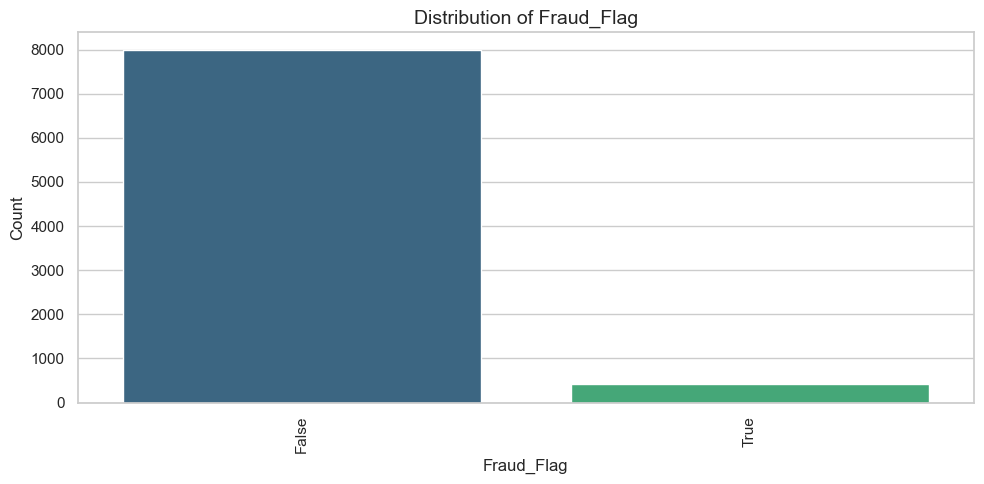

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


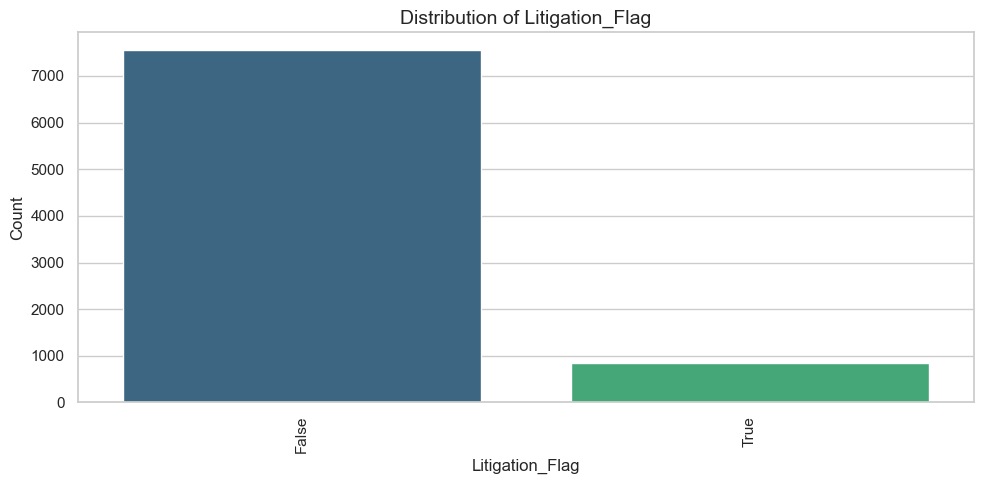

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


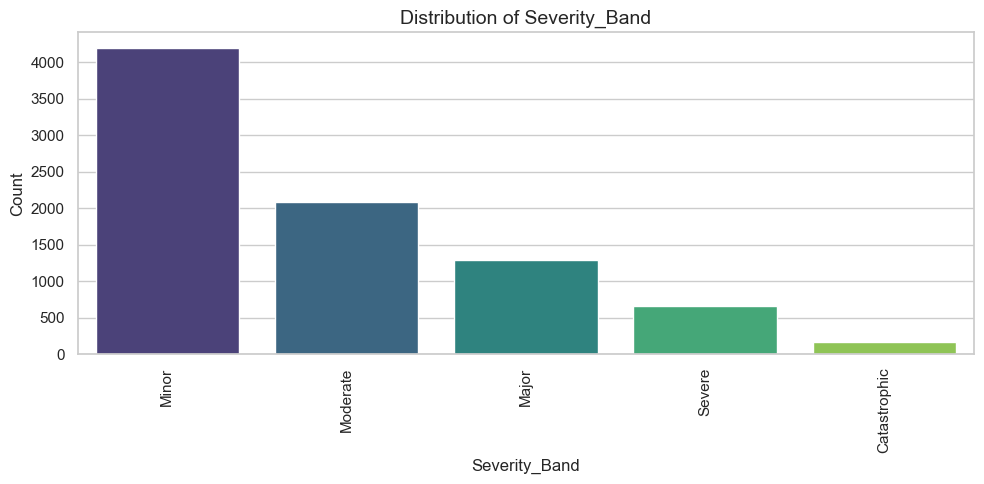

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


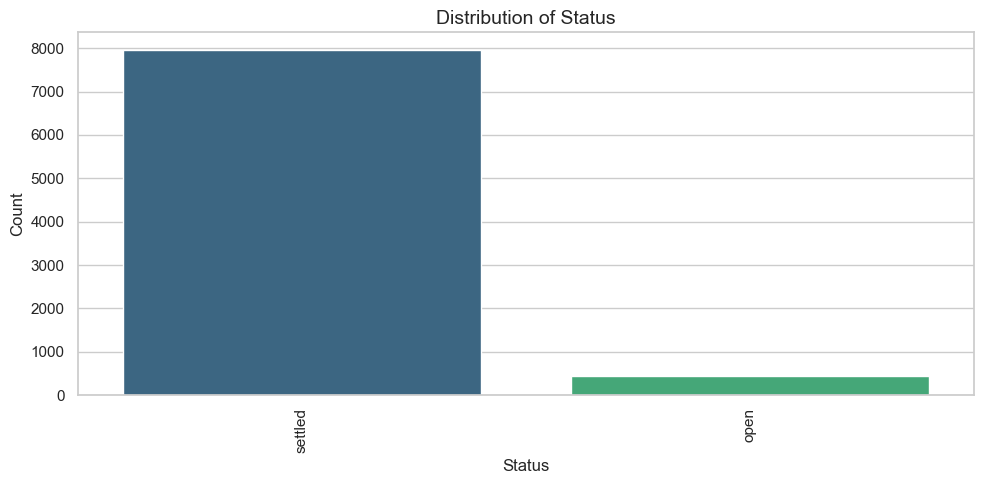

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


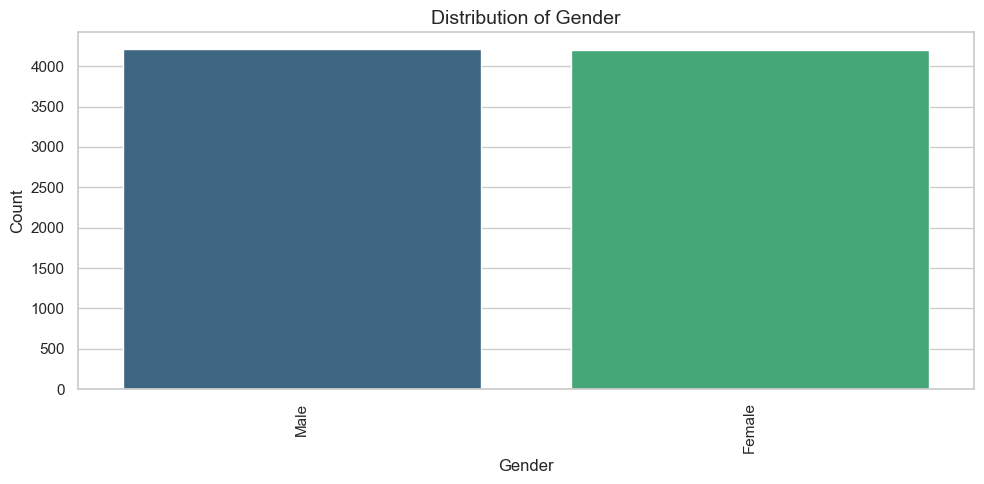

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


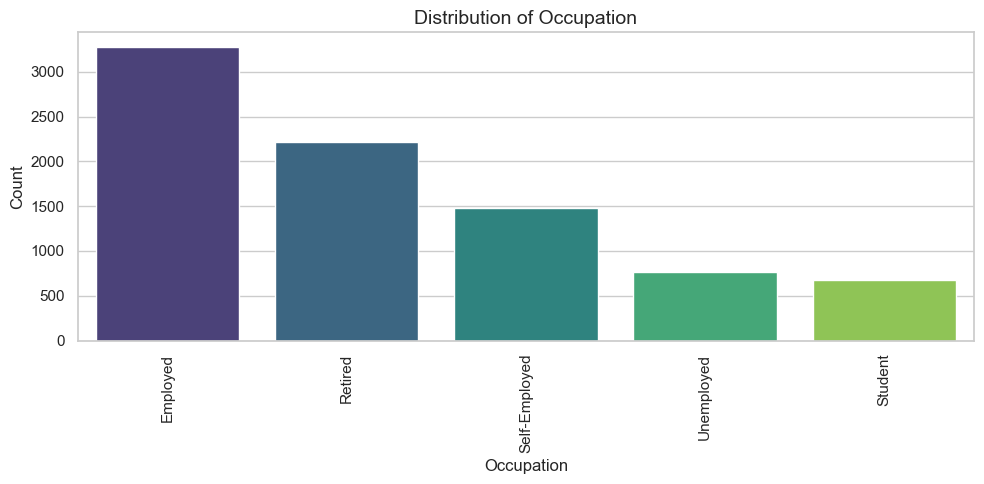

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


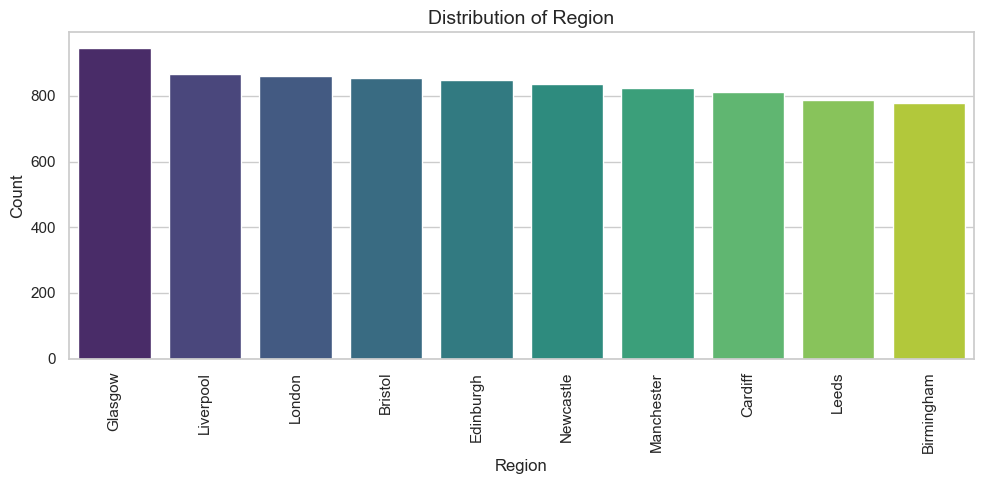

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


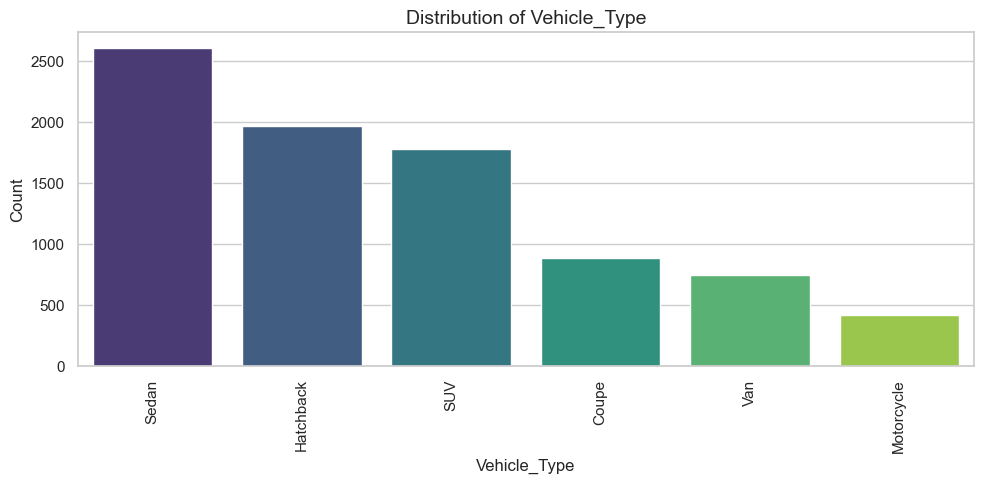

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


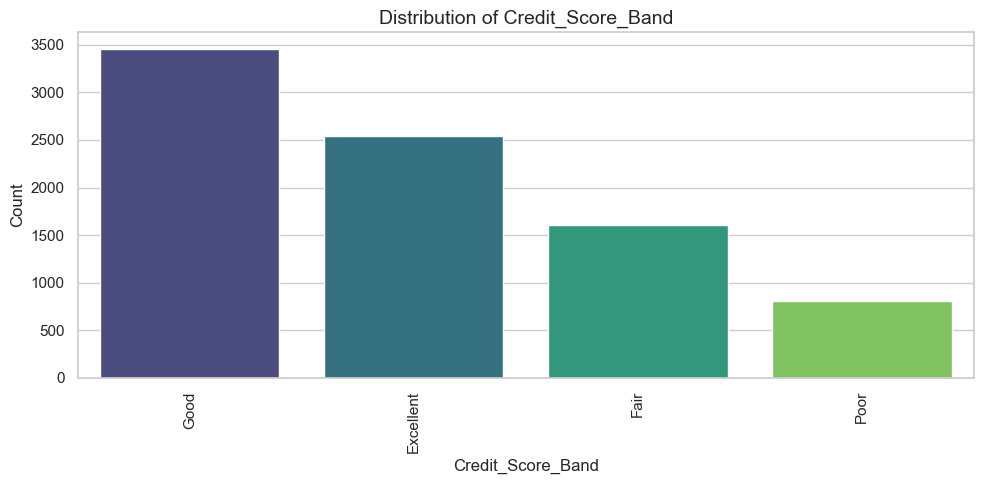

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


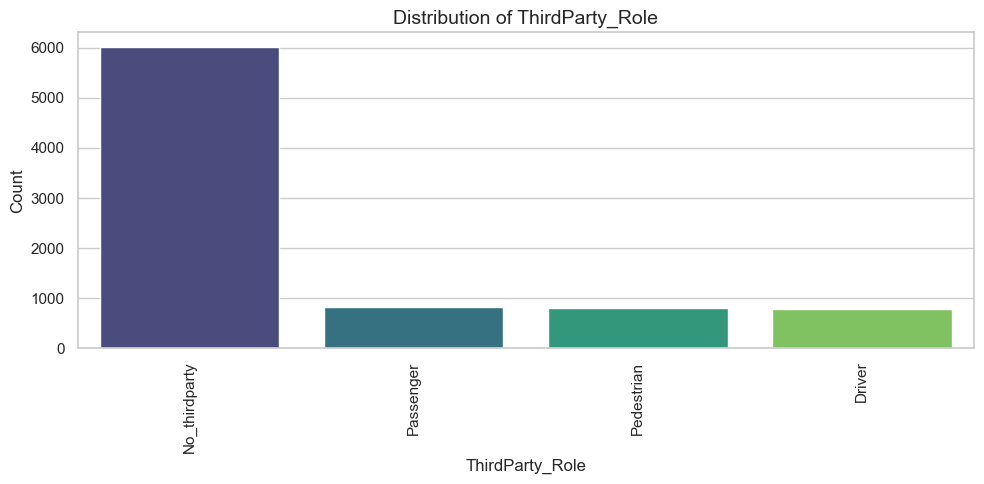

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


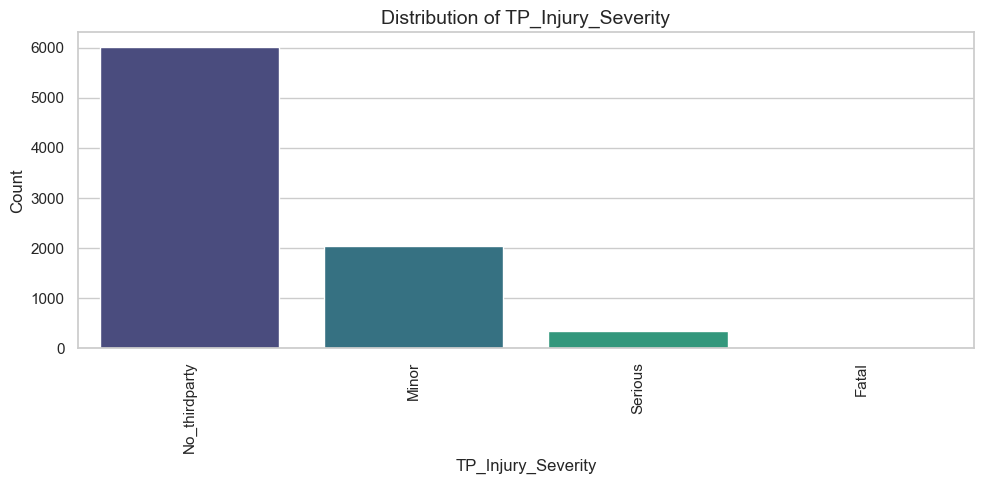

In [33]:
# Automatically select categorical columns (object, bool, category)
categorical_cols = data.select_dtypes(include=['object', 'bool', 'category']).columns

# Set a common style
sns.set(style="whitegrid")

# Loop through each categorical column and plot a barplot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show();

#### Categorical data Observation

    - A thorough examination of all patterns and potential issues was conducted, and no inconsistencies were identified within the categorical data.

In [34]:
# Let verify the principal descretive statistic
data.describe(include='all')

,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,...,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,ThirdParty_Role,TP_Injury_Severity
count,8413,8413,8413,8413,8413,8413,8.413000e+03,8.413000e+03,8413,8413,...,8413,8413,8413,8413.000000,8413.000000,8413,8413.000000,8413,8413,8413
unique,NaN,NaN,6,3,2,2,NaN,NaN,5,NaN,...,2,5,10,NaN,NaN,6,NaN,4,4,4
top,NaN,NaN,Collision,Low,False,False,NaN,NaN,Minor,NaN,...,Male,Employed,Glasgow,NaN,NaN,Sedan,NaN,Good,No_thirdparty,No_thirdparty
freq,NaN,NaN,4614,5870,7993,7557,NaN,NaN,4201,NaN,...,4208,3276,946,NaN,NaN,2605,NaN,3458,6003,6003
mean,2022-03-31 23:54:51.905384704,2022-04-02 18:02:46.884583168,NaN,NaN,NaN,NaN,1.458019e+04,1.270452e+04,NaN,2022-05-22 08:21:40.843931904,...,NaN,NaN,NaN,12139.720433,29.029716,NaN,10.060502,NaN,NaN,NaN
min,2018-09-19 00:00:00,2018-09-19 00:00:00,NaN,NaN,NaN,NaN,5.500000e+02,3.320000e+02,NaN,2018-10-25 00:00:00,...,NaN,NaN,NaN,500.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,2020-06-20 00:00:00,2020-06-22 00:00:00,NaN,NaN,NaN,NaN,2.203000e+03,1.631000e+03,NaN,2020-06-22 00:00:00,...,NaN,NaN,NaN,9393.000000,14.000000,NaN,5.000000,NaN,NaN,NaN
50%,2022-04-06 00:00:00,2022-04-07 00:00:00,NaN,NaN,NaN,NaN,4.407000e+03,3.409000e+03,NaN,2022-05-06 00:00:00,...,NaN,NaN,NaN,12087.000000,29.000000,NaN,10.000000,NaN,NaN,NaN
75%,2024-01-02 00:00:00,2024-01-04 00:00:00,NaN,NaN,NaN,NaN,1.169100e+04,9.041000e+03,NaN,2024-03-12 00:00:00,...,NaN,NaN,NaN,14875.000000,45.000000,NaN,15.000000,NaN,NaN,NaN
max,2025-09-17 00:00:00,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,1.064239e+06,1.005590e+06,NaN,2027-03-29 00:00:00,...,NaN,NaN,NaN,27410.000000,61.000000,NaN,20.000000,NaN,NaN,NaN


#### Observation

#### Let visualize also the no categorical features

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\H

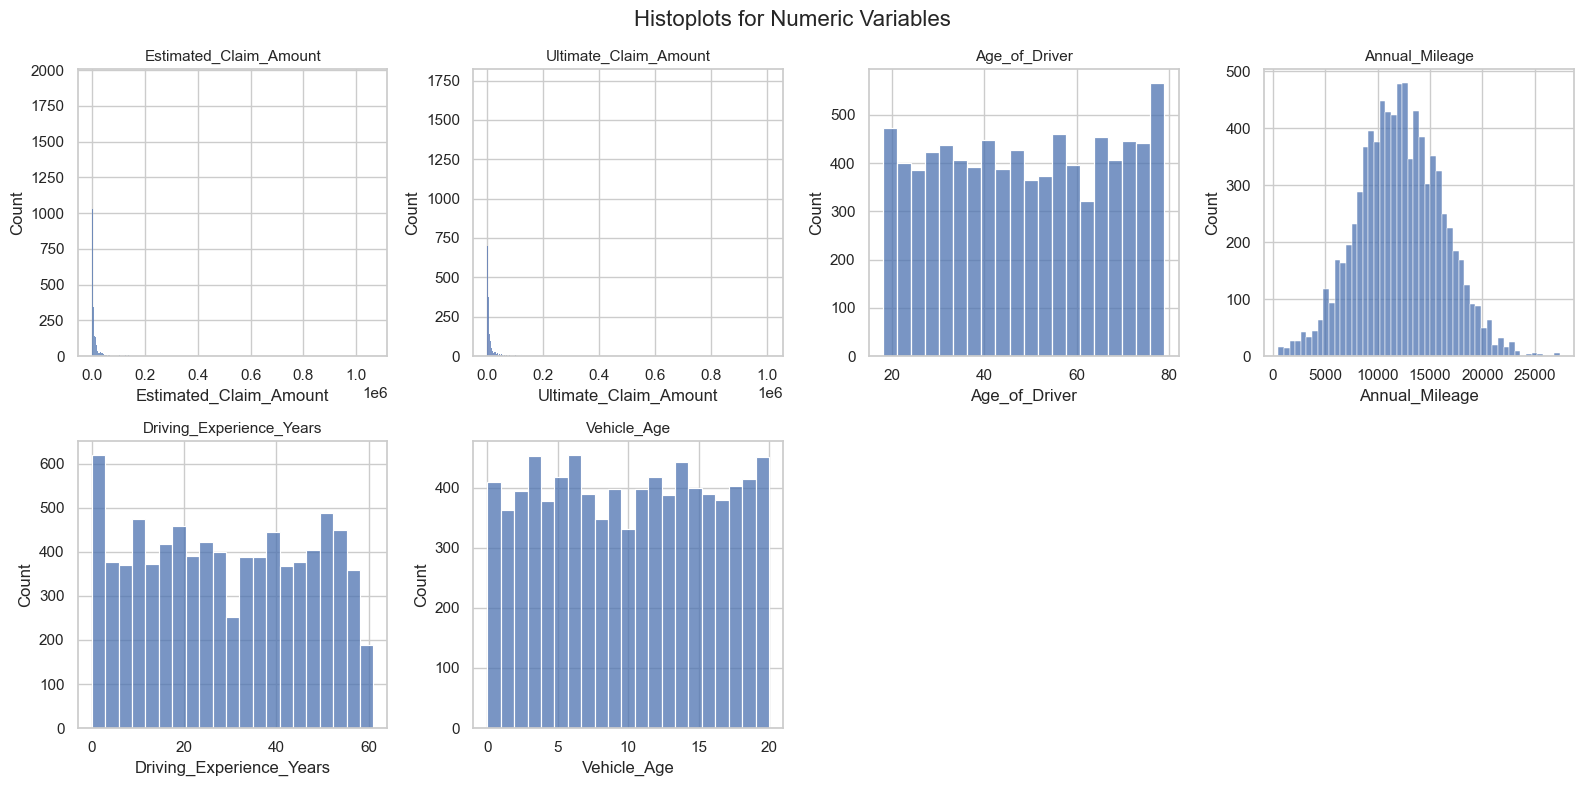

In [35]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a histplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(x=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histoplots for Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show();

### Numeric Variable Observation



    Based on our observations, there are seven non-categorical (numerical) variables in the dataset:

***1. Estimated_Claim_Amount and Ultimate_Claim_Amount***

     Both variables exhibit a strong right-skewed (positively skewed) distribution, characterized by a long right tail. The majority of claims are of        relatively low value, while a small number of claims are exceptionally large. These extreme values may represent outliers and should be further         examined during the validation and data-cleaning stages.

***2. Age_of_Driver***

    This variable appears to be approximately uniformly distributed across age groups, with minor irregularities but no pronounced skew.

***3. Annual_Mileage***

    Annual mileage follows an approximately normal distribution, displaying a clear bell-shaped curve centered around 12,000–15,000 miles.

***4. Driving_Experience_Years***

This distribution is relatively uniform with some variation and does not demonstrate a significant skew.

***5. Vehicle_Age***

     Vehicle age appears to be fairly uniformly distributed, with a slight bimodal tendency. Values are spread across a range of 0 to 20 years, with         minor fluctuations and no strong skewness.

***6. Is_Settled***

    This variable represents a binary (discrete) distribution. The data is highly imbalanced, with the majority of observations indicating settled claims (value = 1) and only a small proportion indicating unsettled claims (value = 0).


#### Let check outlier

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `

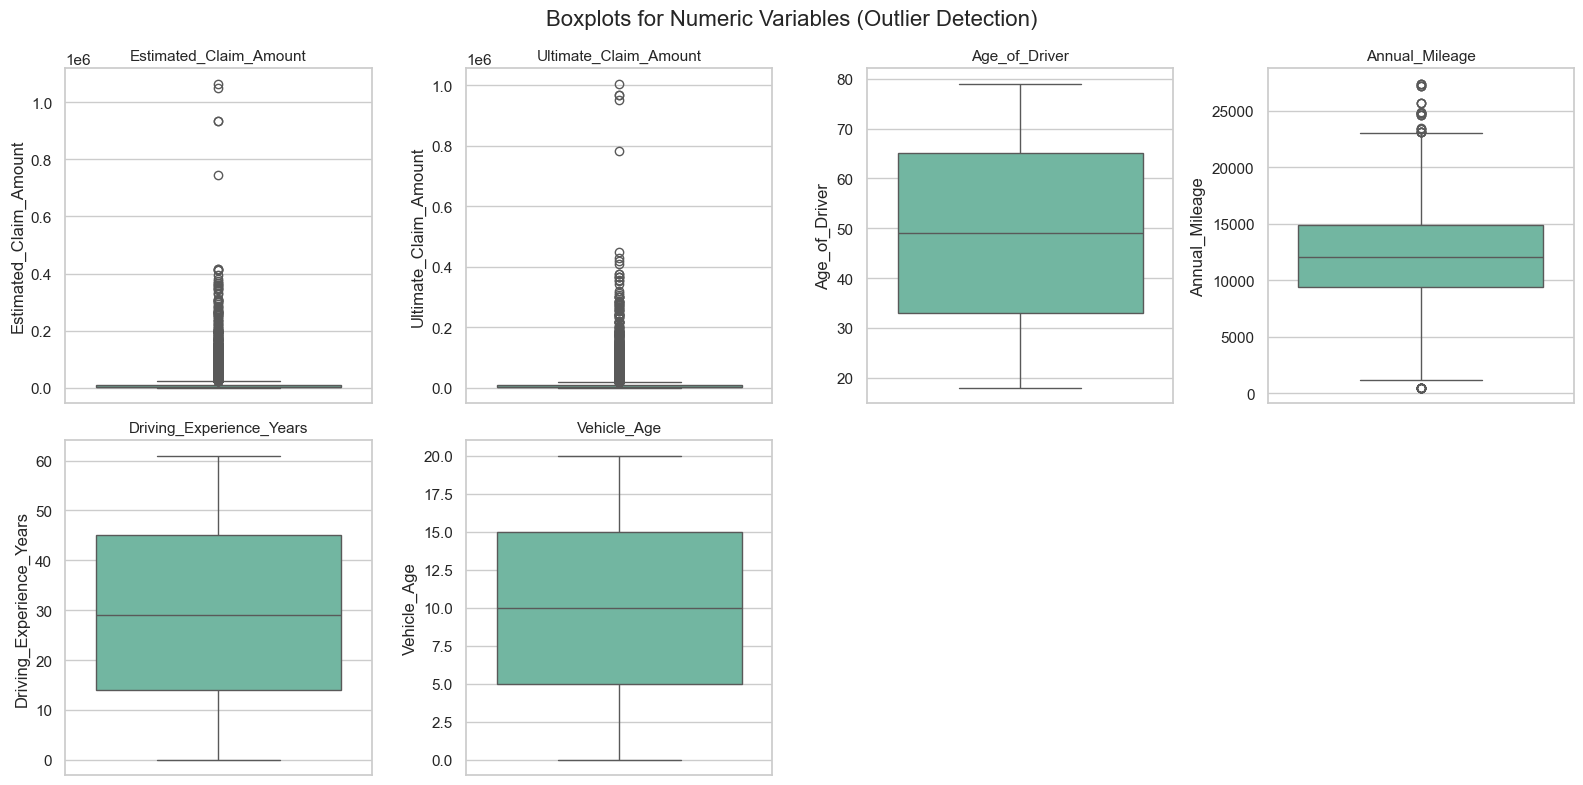

In [36]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots for Numeric Variables (Outlier Detection)", fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
#let see the number that are outlier

# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Create a DataFrame to store bounds
outlier_bounds = pd.DataFrame(columns=["Column", "Q1", "Q3", "IQR", "Lower_Bound", "Upper_Bound"])

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_bounds = pd.concat([
        outlier_bounds,
        pd.DataFrame({
            "Column": [col],
            "Q1": [Q1],
            "Q3": [Q3],
            "IQR": [IQR],
            "Lower_Bound": [lower],
            "Upper_Bound": [upper]
        })
    ], ignore_index=True)

# Show numeric bounds
print(outlier_bounds)


                     Column      Q1       Q3     IQR  Lower_Bound  Upper_Bound
0    Estimated_Claim_Amount  2203.0  11691.0  9488.0     -12029.0      25923.0
1     Ultimate_Claim_Amount  1631.0   9041.0  7410.0      -9484.0      20156.0
2             Age_of_Driver    33.0     65.0    32.0        -15.0        113.0
3            Annual_Mileage  9393.0  14875.0  5482.0       1170.0      23098.0
4  Driving_Experience_Years    14.0     45.0    31.0        -32.5         91.5
5               Vehicle_Age     5.0     15.0    10.0        -10.0         30.0


C:\Users\HP\AppData\Local\Temp\ipykernel_14072\477763034.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_bounds = pd.concat([


### Let investigate outlier

In [38]:
# Define outlier thresholds
lower_bound = -12029.0
upper_bound = 25923.0

# Filter the DataFrame to keep only values within the bounds
outlier_data = data[
    (data["Estimated_Claim_Amount"] >= upper_bound)]

# Preview the resulting DataFrame
outlier_data.head()




,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,...,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,ThirdParty_Role,TP_Injury_Severity
2,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,Catastrophic,2022-04-22,...,Female,Unemployed,Newcastle,10793,0,SUV,5,Excellent,Passenger,Minor
11,2019-01-27,2019-01-28,Collision,Low,False,False,27742,27274.0,Severe,2019-04-18,...,Female,Employed,Birmingham,13894,26,Hatchback,7,Excellent,No_thirdparty,No_thirdparty
20,2025-01-03,2025-01-03,Fire,High,False,False,254781,240233.0,Severe,2025-11-18,...,Male,Employed,Glasgow,9510,22,Hatchback,15,Excellent,No_thirdparty,No_thirdparty
27,2021-11-01,2021-11-01,Weather,Low,False,False,97925,83494.0,Severe,2022-01-20,...,Female,Retired,Bristol,11777,39,Coupe,9,Fair,No_thirdparty,No_thirdparty
29,2020-07-03,2020-07-10,Collision,Medium,False,False,119420,137304.0,Catastrophic,2021-04-15,...,Female,Self-Employed,Edinburgh,8037,29,Sedan,18,Excellent,Passenger,Minor


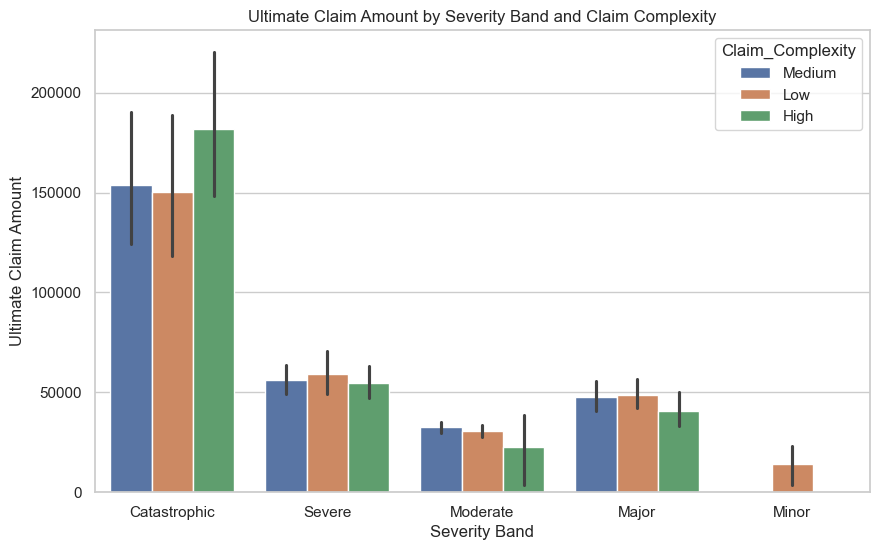

In [39]:
# Let Visualize what upper bound, that generate the otlier means

plt.figure(figsize=(10, 6))
sns.barplot(
    data=outlier_data,
    x="Severity_Band",
    y="Ultimate_Claim_Amount",
    hue="Claim_Complexity"
)
plt.title("Ultimate Claim Amount by Severity Band and Claim Complexity")
plt.xlabel("Severity Band")
plt.ylabel("Ultimate Claim Amount")
plt.show()


### Observation

---

### Observations on Outliers in Ultimate Claim Amount

1. **Catastrophic Severity Band Shows the Strongest Outlier Behavior**
   The *Catastrophic* severity band exhibits the highest Ultimate Claim Amounts across all levels of claim complexity. The wide error bars and elevated mean values—particularly for **High complexity claims**—indicate substantial variability. This suggests the presence of extreme claims that significantly exceed typical cost levels and are likely true outliers driven by exceptional loss events rather than data quality issues.

2. **High Complexity Amplifies Outlier Magnitude**
   Across most severity bands, **High complexity claims** show greater dispersion compared to Low and Medium complexity claims. This pattern is most pronounced in the *Catastrophic* and *Severe* bands, implying that complex claims are more susceptible to escalation due to legal involvement, prolonged settlement periods, or multiple third parties—factors that can generate legitimate high-value outliers.

3. **Moderate and Major Severity Bands Contain Isolated High-Value Outliers**
   While the *Moderate* and *Major* severity bands generally cluster at lower Ultimate Claim Amounts, the relatively long error bars—especially for Medium and High complexity—suggest occasional claims with unusually high costs. These points likely represent atypical cases where moderate-severity incidents evolved into costly outcomes.

4. **Minor Severity Band Displays Limited but Noticeable Variability**
   The *Minor* severity band shows low overall claim amounts; however, the visible variability indicates that even minor claims can occasionally result in higher-than-expected settlements. These may be driven by ancillary costs, disputes, or delayed resolution rather than physical damage severity.

5. **Outliers Appear Systematic Rather Than Random**
   The concentration of extreme values in higher severity and higher complexity categories suggests that outliers are **structurally driven** by claim characteristics, not random noise or data errors. This supports retaining these observations for modeling and risk assessment rather than removing them indiscriminately.

---

### Key Takeaway

Outliers in Ultimate Claim Amount are primarily associated with **high severity and high complexity claims**, particularly within the *Catastrophic* category. These outliers likely represent legitimate high-cost events and provide critical insight into tail risk, rather than anomalies requiring automatic exclusion.

Outliers can cause instability during training, especially with loss functions like RMSE that penalize large errors quadratically.

Transforming the target variable compresses the scale, reducing the gap between regular and extreme values.


In [40]:
# Let do value count on Target Variabkle
data['Ultimate_Claim_Amount'].value_counts().sum()

np.int64(8413)

In [41]:
# Let apply Log Transformation

data['log_Claim_Amount'] = np.log1p(data['Ultimate_Claim_Amount'])
data['log_Estimated_Claim_Amount'] = np.log1p(data['Estimated_Claim_Amount'])

In [42]:
# Let Check the sum after applying Log Transform
data['log_Claim_Amount'].value_counts().sum()

np.int64(8413)

In [43]:
# Remove the 'Ultimate_Claim_Amount' column from the DataFrame, as per our target variable is going to be Log_Claim_Amount
data = data.drop(columns=['Ultimate_Claim_Amount', 'Estimated_Claim_Amount'])


### Let Chech Outlier after Log Transform

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\4014392158.py:13: FutureWarning: 

Passing `

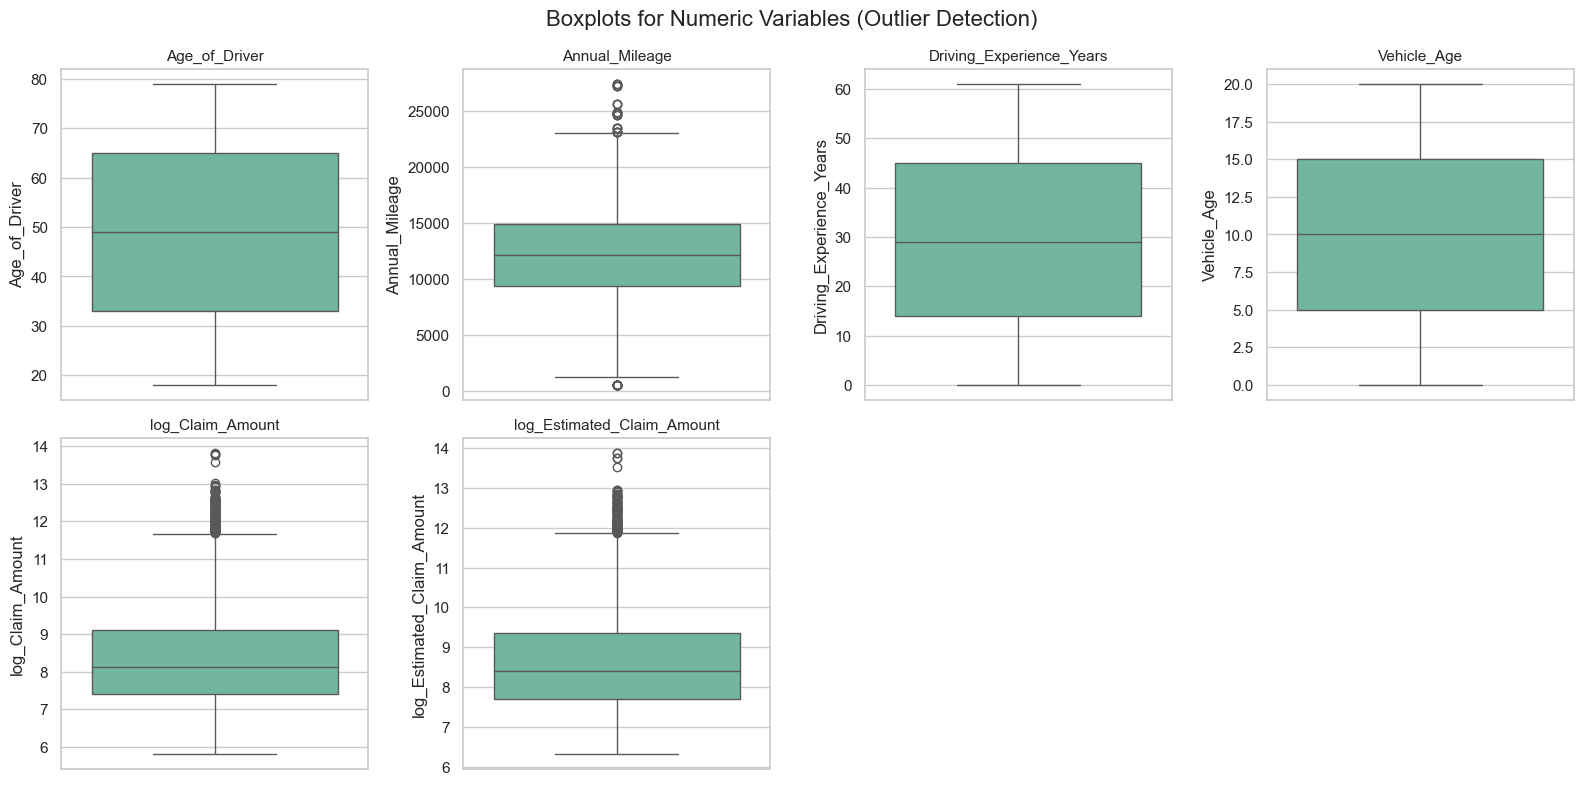

In [44]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots for Numeric Variables (Outlier Detection)", fontsize=16)
plt.tight_layout()
plt.show()

### Outlier after applying Log Transform Observation

    After applying the log Transform, the distribution it looks more stable.
    The Estimated_Claim_Amount, might have data leakage. 
    Because we want to predict The final Claim amount, we dicide to drop this colum.

In [45]:
# Drop Estimated_Claim_Amount
data.drop(columns=['log_Estimated_Claim_Amount'], inplace=True)

#### Let Check the correlation

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Accident_Date             8413 non-null   datetime64[ns]
 1   FNOL_Date                 8413 non-null   datetime64[ns]
 2   Claim_Type                8413 non-null   object        
 3   Claim_Complexity          8413 non-null   object        
 4   Fraud_Flag                8413 non-null   bool          
 5   Litigation_Flag           8413 non-null   bool          
 6   Severity_Band             8413 non-null   object        
 7   Settlement_Date           8413 non-null   datetime64[ns]
 8   Status                    8413 non-null   object        
 9   Age_of_Driver             8413 non-null   int64         
 10  Gender                    8413 non-null   object        
 11  Occupation                8413 non-null   object        
 12  Region              

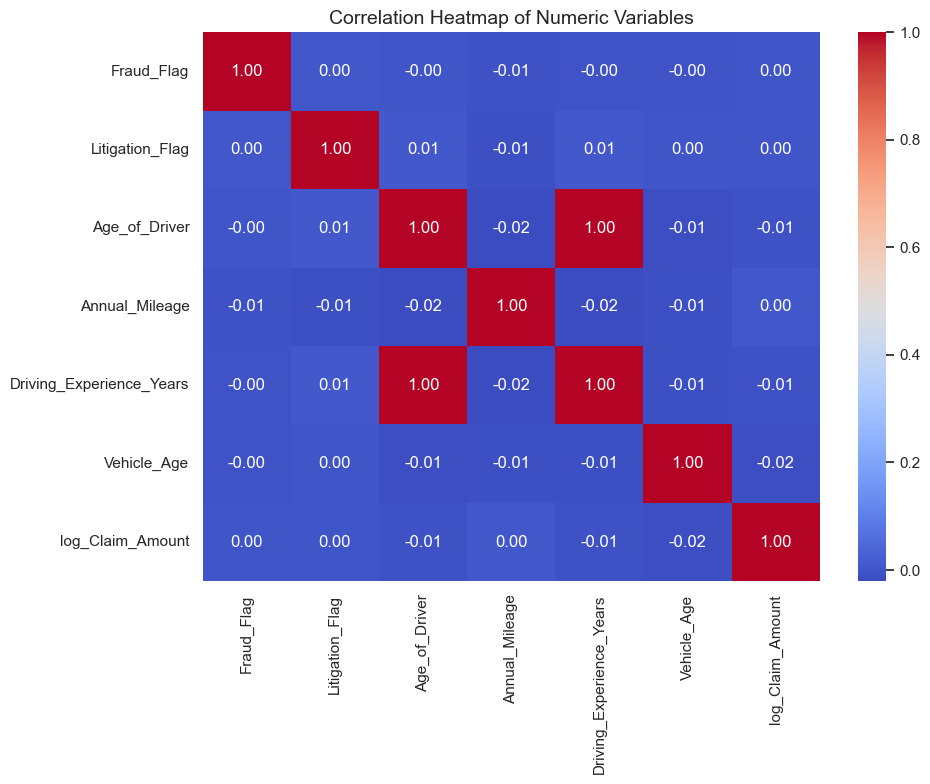

In [47]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64", "bool"]).columns

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation values
    fmt=".2f",        # Format to 2 decimal places
    cmap="coolwarm",  # Color map
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()

#### Correlation Observation

    Strong Positive Correlation:
    
Estimated_Claim_Amount and Ultimate_Claim_Amount have a very high positive correlation (around 0.99). This makes sense because the ultimate claim amount is typically an updated, final value closely related to the initial estimate.that way we remove them.

    Age_of_Driver and Driving_Experience_Years are perfectly correlated (1.00).

This likely indicates that these two variables are closely tied—perhaps driving experience is directly derived from the driver's age.

    No Significant Correlation Among Flags and Amounts:
Fraud_Flag and Litigation_Flag show almost no correlation with claim amounts or other numeric variables.

This suggests these flags might be independent indicators or binary labels without strong linear association with monetary amounts.

    No Meaningful Correlation for Annual_Mileage and Vehicle_Age:
These have very weak or near-zero correlations with other numeric features.

    Is_Settled shows almost no correlation with claim amounts or other variables, close to zero.
    
    Missing Values Effect:

Some missing values in Ultimate_Claim_Amount may have led to blanks in the heatmap (white squares), so interpret cautiously.

In [48]:
# Datetime Feature Engineering
datetime_cols = ['Accident_Date', 'FNOL_Date', 'Settlement_Date']

for col in datetime_cols:
    data[col + '_Year'] = data[col].dt.year
    data[col + '_Month'] = data[col].dt.month
    data[col + '_Day'] = data[col].dt.day
    data[col + '_Weekday'] = data[col].dt.weekday  # 0=Monday, 6=Sunday

# Duration between Accident and Settlement
data['Days_to_Settle'] = (data['Settlement_Date'] - data['Accident_Date']).dt.days

# Drop original datetime columns
data = data.drop(columns=datetime_cols)


#### Encode Categorical data

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_Type                8413 non-null   object 
 1   Claim_Complexity          8413 non-null   object 
 2   Fraud_Flag                8413 non-null   bool   
 3   Litigation_Flag           8413 non-null   bool   
 4   Severity_Band             8413 non-null   object 
 5   Status                    8413 non-null   object 
 6   Age_of_Driver             8413 non-null   int64  
 7   Gender                    8413 non-null   object 
 8   Occupation                8413 non-null   object 
 9   Region                    8413 non-null   object 
 10  Annual_Mileage            8413 non-null   int64  
 11  Driving_Experience_Years  8413 non-null   int64  
 12  Vehicle_Type              8413 non-null   object 
 13  Vehicle_Age               8413 non-null   int64  
 14  Credit_S

In [50]:
# data fist 10 rows confirmation
data.head(10)

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Severity_Band,Status,Age_of_Driver,Gender,Occupation,Region,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,Theft,Medium,False,True,Minor,settled,53,Female,Retired,Glasgow,...,3,2019,12,19,3,2020,3,1,6,73
1,Collision,Low,False,False,Minor,settled,43,Female,Employed,Newcastle,...,6,2018,12,31,0,2019,3,23,5,83
2,Other,Medium,False,False,Catastrophic,settled,19,Female,Unemployed,Newcastle,...,1,2021,10,19,1,2022,4,22,4,185
3,Weather,Low,False,False,Minor,settled,26,Male,Employed,Newcastle,...,4,2021,6,18,4,2021,9,13,0,87
4,Theft,Low,False,False,Minor,settled,27,Female,Unemployed,Leeds,...,6,2021,3,24,2,2021,5,26,2,66
5,Weather,Low,False,False,Minor,settled,51,Female,Employed,Newcastle,...,6,2020,4,13,0,2020,6,15,0,64
6,Weather,Medium,False,False,Major,settled,36,Female,Employed,Liverpool,...,1,2019,11,15,4,2020,5,19,1,189
7,Fire,Low,False,False,Minor,settled,64,Female,Self-Employed,Bristol,...,2,2024,11,2,5,2024,12,22,6,53
8,Vandalism,Medium,False,False,Minor,settled,54,Male,Employed,Bristol,...,1,2019,9,14,5,2020,2,19,2,162
9,Collision,Low,False,False,Minor,settled,29,Male,Employed,Cardiff,...,5,2025,5,4,6,2025,6,22,6,50


In [51]:
#### Import LabelEncoder libery
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [52]:
# Includes columns with data type 'object' (strings) and 'bool' (binary categorical)
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns.tolist()


In [53]:
# Initialize LabelEncoder
le = LabelEncoder()

# Loop through categorical columns and apply LabelEncoder
for col in categorical_cols:
    # Only encode if the column is not already numeric
    if data[col].dtype == 'object' or data[col].dtype == 'bool':
        data[col] = le.fit_transform(data[col])

In [54]:
# Check the first few rows
data.head()

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Severity_Band,Status,Age_of_Driver,Gender,Occupation,Region,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,3,2,0,1,2,1,53,0,1,4,...,3,2019,12,19,3,2020,3,1,6,73
1,0,1,0,0,2,1,43,0,0,9,...,6,2018,12,31,0,2019,3,23,5,83
2,2,2,0,0,0,1,19,0,4,9,...,1,2021,10,19,1,2022,4,22,4,185
3,5,1,0,0,2,1,26,1,0,9,...,4,2021,6,18,4,2021,9,13,0,87
4,3,1,0,0,2,1,27,0,4,5,...,6,2021,3,24,2,2021,5,26,2,66


In [55]:
# Columns to convert to 0/1 (boolean)
data["Fraud_Flag"] = data["Fraud_Flag"].astype(int)
data["Litigation_Flag"] = data["Litigation_Flag"].astype(int)

### Normalization

    Based on non categorical observation plots, we realized that the data distribution are Normal distribution and uniform distribution, which it means
    we will use for normalization(Scale) StandardScaler

In [56]:
# Let Import the libery
from sklearn.preprocessing import StandardScaler

In [57]:
# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical columns
print("Numerical columns:", numeric_cols)


# Fit scaler on the numeric columns and transform
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

Numerical columns: ['Claim_Type', 'Claim_Complexity', 'Fraud_Flag', 'Litigation_Flag', 'Severity_Band', 'Status', 'Age_of_Driver', 'Gender', 'Occupation', 'Region', 'Annual_Mileage', 'Driving_Experience_Years', 'Vehicle_Type', 'Vehicle_Age', 'Credit_Score_Band', 'ThirdParty_Role', 'TP_Injury_Severity', 'log_Claim_Amount', 'Days_to_Settle']


In [58]:
# Data confirmation
data.head()

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Severity_Band,Status,Age_of_Driver,Gender,Occupation,Region,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,0.707181,1.613585,-0.229229,2.971241,-0.243569,0.236323,0.226241,-1.000357,-0.171154,-0.185265,...,3,2019,12,19,3,2020,3,1,6,0.074164
1,-0.805663,-0.270797,-0.229229,-0.336560,-0.243569,0.236323,-0.332702,-1.000357,-0.947809,1.573519,...,6,2018,12,31,0,2019,3,23,5,0.108422
2,0.202899,1.613585,-0.229229,-0.336560,-2.552466,0.236323,-1.674165,-1.000357,2.158812,1.573519,...,1,2021,10,19,1,2022,4,22,4,0.457862
3,1.715743,-0.270797,-0.229229,-0.336560,-0.243569,0.236323,-1.282904,0.999643,-0.947809,1.573519,...,4,2021,6,18,4,2021,9,13,0,0.122126
4,0.707181,-0.270797,-0.229229,-0.336560,-0.243569,0.236323,-1.227010,-1.000357,2.158812,0.166492,...,6,2021,3,24,2,2021,5,26,2,0.050182


### 5 DATA SPLITTING

    The TARGET VARIABLE for this poroject is to predict the Ultimate_Claim_Amount based on FNOL
    Our TARGET VARIABLE, is a continue variable (Non binary, or Classification target variable)

    we will split our data in 80% for training and 20% for testing

In [59]:
# Let import librery
from sklearn.model_selection import train_test_split

In [60]:
# Define feature columns (continuous variables)
X = data.drop(columns=['log_Claim_Amount'])

# Define target column (replace 'target_col' with your actual target)
target_col = 'log_Claim_Amount'
y = data[target_col]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 6 MODEL SELECTION

BUSINESS CHALLENGE 

    Insurance companies make critical pricing and reserving decisions based on claims 
data. 
    A major challenge is the uncertainty of the ultimate settlement amount at the time of First Notification of Loss (FNOL). 

● Operational issue:

    When a customer files a claim, only partial information is available, 
but regulators require insurers to allocate capital reserves immediately. 

Inaccurate estimates either tie up excess funds (reducing profitability) or under-allocate reserves 
(creating solvency risks). 
 
● Financial issue: 

     Large and complex claims (e.g., accidents with multiple third parties) 
can take years to settle, making forecasting essential for financial planning. 

● Customer impact: 
                                                      
    Slow or incorrect assessments delay settlements, reducing trust and 
competitive advantage. 
                                                      
Pain points identified: 
                                                      
    1. Incomplete FNOL data leads to uncertainty. 
    2. Claims cost distribution is highly skewed (many small, few very large). 
    3. Lack of advanced predictive tools; current methods rely heavily on actuarial judgment. 
    4. Inefficient allocation of reserves. 
    5. Risk of regulatory non-compliance due to reserve misestimation


PROJECT OBJECTIVES 
                                                      
    1. Develop a machine learning model to predict ultimate claim cost at FNOL. 
    
    2. Identify and rank the most influential claim features (e.g., number of third parties, 
accident severity). 

    3. Improve reserve allocation accuracy by at least 15% compared to current actuarial 
benchmarks. 

    4. Integrate explainability techniques (e.g., SHAP) to ensure regulatory acceptance. 
    
    5. Deploy the solution into GMA’s claims management system with minimal disruption.

Since our dataset contains missing values, we will use XGBoost and LightGBM, which are robust to missing data and can handle it natively without the need for imputation.
                                                   

In [61]:
# Install Ligghtgbm
!pip install lightgbm


In [62]:
# Import libraries
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [63]:
# XGboost Model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)



# CatBoost Model
cat_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function="RMSE",
    random_seed=42,
    verbose=False
)
# Train CatBoost
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)


# LightBoost Model
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train lightBoost
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)



# Linear Regression Model

lin_model = LinearRegression()

lin_model.fit(X_train, y_train)
lin_preds = lin_model.predict(X_test)


# Ridge Regression l2 Regulazation
ridge_model = Ridge(alpha=1.0, random_state=42)

ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# Lasso Regulazation L1 Regulazation Model
lasso_model = Lasso(alpha=0.01, random_state=42)

lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

# Enelasticnet Model


enet_model = ElasticNet(
    alpha=0.01,
    l1_ratio=0.5,
    random_state=42
)

enet_model.fit(X_train, y_train)
enet_preds = enet_model.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 6730, number of used features: 30
[LightGBM] [Info] Start training from score -0.004855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### 7 EVALUATION

In [64]:
# Import evaluation metrics liberie
def evaluate(y_true, y_pred, name, epsilon=1e-8):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Safe MAPE
    mape = np.mean(
        np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))
    ) * 100

    print(
        f"{name:<12} | RMSE: {rmse:.3f}, "
        f"MAE: {mae:.3f}, "
        f"MAPE: {mape:.2f}%, "
        f"R²: {r2:.3f}"
    )

In [65]:
evaluate(y_test, xgb_preds, "XGBoost")
evaluate(y_test, lgb_preds, "LightGBM")
evaluate(y_test, cat_preds, "CatBoost")
evaluate(y_test, lin_preds, "Linear")
evaluate(y_test, ridge_preds, "Ridge")
evaluate(y_test, lasso_preds, "Lasso")
evaluate(y_test, enet_preds, "ElasticNet")

XGBoost      | RMSE: 0.252, MAE: 0.192, MAPE: 67.99%, R²: 0.936
LightGBM     | RMSE: 0.267, MAE: 0.201, MAPE: 73.99%, R²: 0.928
CatBoost     | RMSE: 0.253, MAE: 0.193, MAPE: 69.23%, R²: 0.936
Linear       | RMSE: 0.965, MAE: 0.790, MAPE: 135.43%, R²: 0.063
Ridge        | RMSE: 0.965, MAE: 0.789, MAPE: 135.42%, R²: 0.064
Lasso        | RMSE: 0.964, MAE: 0.789, MAPE: 128.57%, R²: 0.064
ElasticNet   | RMSE: 0.964, MAE: 0.788, MAPE: 130.79%, R²: 0.065


### Observation

Dataset is clearly non-linear, and boosting models capture it very well.
Among all evaluated models, **XGBoost** achieved the best performance, 
with the **lowest RMSE**=0.252 , **MAE**=0.192 , **MAP#** = 67.99% and the highest **R² (0.936)**, 
indicating **superior accuracy** and **strong ability to capture non-linear relationships** in the data.

**R² (0.936)** means the model is expalining 93.6% of the variation on target variable, which it means the model is predictiob very close to the real values.

### Hyperparametre tuning

In [66]:
# Import librerie 
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor


# Define parameter grid (CatBoost-compatible)
cat_params = {
    'n_estimators': [100, 200, 300],
    'depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'rsm': [0.6, 0.8, 1.0]  # replaces colsample_bytree
}

# Initialize model
cat_model = CatBoostRegressor(
    random_state=42,
    verbose=0
)

# Randomized Search
cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit search
cat_search.fit(X_train, y_train)

# Best parameters and score
print("Best CatBoost Parameters:", cat_search.best_params_)
print("Best CatBoost RMSE:", -cat_search.best_score_)


Best CatBoost Parameters: {'subsample': 0.8, 'rsm': 0.8, 'n_estimators': 300, 'learning_rate': 0.05, 'depth': 5}
Best CatBoost RMSE: 0.2573613722621982


In [67]:
# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.3]
}


# Initialize model
xgb_model = xgb.XGBRegressor(random_state=42)

# Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
xgb_search.fit(X_train, y_train)

# Best parameters and score
print("Best XGBoost Parameters:", xgb_search.best_params_)
print("Best XGBoost RMSE:", -xgb_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best XGBoost Parameters: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best XGBoost RMSE: 0.2614726022731762


In [68]:
# Let isntall Shap
!pip install shap

### 8 SHAP 

In [69]:
# Initialize the shap
import shap

# Train model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

# SHAP explainer
explainer = shap.TreeExplainer(
    model_xgb,
    data=X_train,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_test, check_additivity=False)

In [70]:
# Ass the Shape
shap_array = shap_values

In [71]:
# Select sample to explain
sample_index = 0

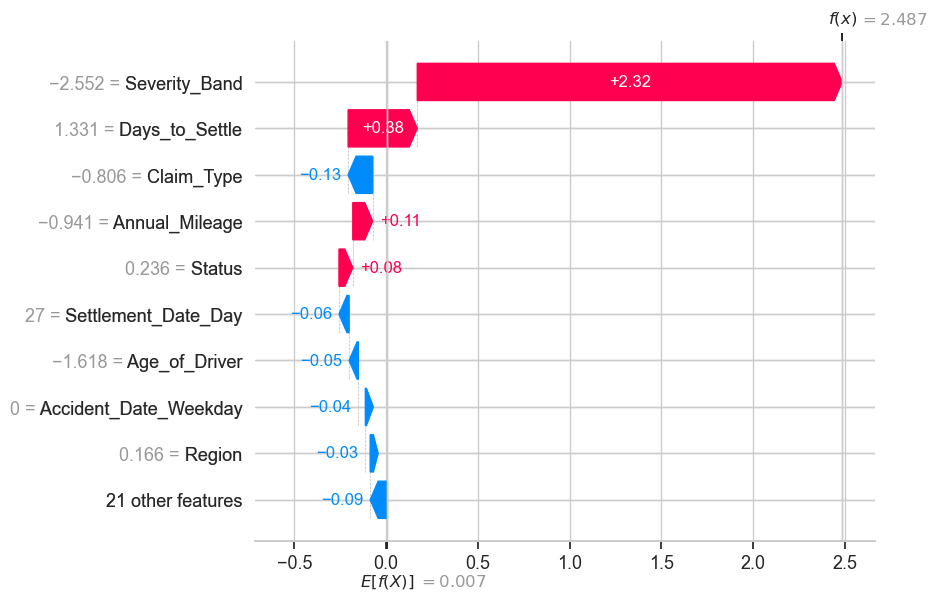

In [72]:
# Build SHAP Explanation object (REGRESSION)
shap_explanation = shap.Explanation(
    values=shap_values[sample_index],
    base_values=explainer.expected_value,
    data=X_test.iloc[sample_index],
    feature_names=X_test.columns
)

# Plot waterfall
shap.plots.waterfall(shap_explanation)


### Observation

---

### Observations from Model Explanation (SHAP Waterfall Plot)


### Executive Summary: SHAP Waterfall Interpretation

* **Prediction Is Dominated by Severity_Band**
  The model output is overwhelmingly driven by **Severity_Band**, which contributes approximately **+2.32** to the prediction. This single variable accounts for the vast majority of the deviation from the baseline and effectively determines the final outcome for this claim.

* **Days_to_Settle Acts as a Secondary Signal**
  **Days_to_Settle (+0.38)** provides the only other material uplift. Its influence is meaningful but clearly subordinate to severity, suggesting it functions as a proxy for claim complexity rather than a primary cost driver.

* **All Other Features Have Minimal Impact**
  Operational, demographic, and temporal variables individually contribute only small positive or negative adjustments. Collectively, the remaining **21 features** have negligible influence on the prediction and do not materially change the outcome once severity is known.

* **High Feature Concentration in Model Behavior**
  The baseline expectation (**E[f(X)] ≈ 0.007**) is shifted almost entirely by two features. This indicates a **highly concentrated decision logic**, with limited diversification across the broader feature set.

---

### Model Risk & Governance Considerations

* **Sensitivity Risk**: Because **Severity_Band** dominates the prediction, any misclassification, upstream data quality issue, or process bias in severity assignment will have a disproportionate impact on model outputs.
* **Control Dependency**: Strong reliance on severity places greater importance on governance, auditability, and consistency of severity rules or models feeding this feature.
* **Limited Incremental Value from Complexity**: The minimal contribution of most variables suggests diminishing returns from additional features and supports potential model simplification or stronger regularization.

---

### Executive Takeaway

The model behaves in a **logically intuitive but highly concentrated manner**, relying primarily on severity assessment and, secondarily, settlement duration. While this aligns with insurance domain expectations, it also elevates **model and operational risk exposure** tied to severity classification, which should be a focal point for validation and controls.

#### The predicted probability for this customer on index 0 to claim is approximately: 92.3%



### 9 Features importance

                     feature  importance
4              Severity_Band    0.574363
29            Days_to_Settle    0.136857
5                     Status    0.113153
0                 Claim_Type    0.107606
11  Driving_Experience_Years    0.003172
22           FNOL_Date_Month    0.003084
16        TP_Injury_Severity    0.003076
2                 Fraud_Flag    0.003065
21            FNOL_Date_Year    0.002978
25      Settlement_Date_Year    0.002964
23             FNOL_Date_Day    0.002948
13               Vehicle_Age    0.002840
20     Accident_Date_Weekday    0.002833
15           ThirdParty_Role    0.002830
26     Settlement_Date_Month    0.002761
27       Settlement_Date_Day    0.002696
28   Settlement_Date_Weekday    0.002695
9                     Region    0.002626
12              Vehicle_Type    0.002580
19         Accident_Date_Day    0.002501
8                 Occupation    0.002500
10            Annual_Mileage    0.002498
17        Accident_Date_Year    0.002490
18       Acciden

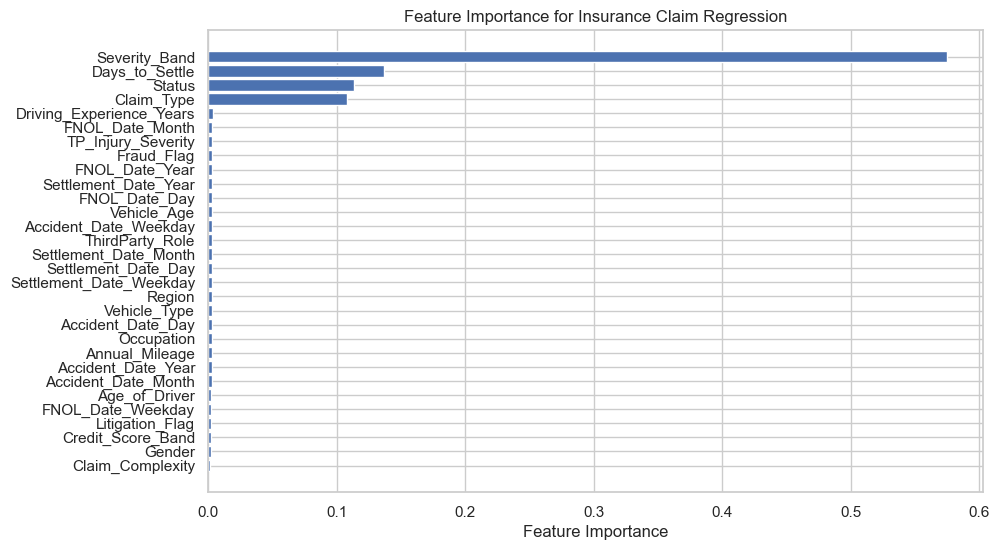

In [73]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display top features
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Insurance Claim Regression")
plt.show()



### Observation


---


### Comparison of Feature Importance and SHAP Interpretability


**Severity_Band Is the Dominant Driver Both Globally and Locally**
From a global perspective, **Severity_Band** is by far the most important feature, contributing the largest share of overall model importance. This dominance is consistently reflected at the local level in the SHAP waterfall, where Severity_Band contributes the majority of the prediction uplift (**~+2.32**). This strong alignment indicates that the model relies heavily on severity assessment both across the portfolio and for individual predictions.

**Days_to_Settle Is a Strong Secondary Feature with Consistent Behavior**
**Days_to_Settle** ranks as the second most important feature globally and also shows a meaningful positive contribution in the SHAP explanation (**~+0.38**). This consistency suggests that settlement duration is a structurally important signal and not merely an artifact of a single observation.

**Several Globally Important Features Have Limited Local Impact**
Features such as **Status** and **Claim_Type** appear relatively influential in the global Feature Importance ranking but contribute only marginally in the local SHAP explanation. This indicates that while these variables improve overall model performance, their influence is conditional and can be overshadowed by stronger drivers like severity and settlement duration in specific claims.

**Low-Importance Features Remain Insignificant at the Local Level**
Variables including **Age_of_Driver**, **Annual_Mileage**, and various temporal attributes show minimal global importance and similarly negligible SHAP contributions. This consistency reinforces that these features act as minor refinements rather than key decision drivers.

---

### Summary

* **Feature Importance** identifies which variables matter most on average across all claims.
* **SHAP waterfall plots** explain how those variables interact to produce a prediction for a specific claim.
* In this model, there is strong alignment between global and local behavior: **Severity_Band** and **Days_to_Settle** drive both portfolio-level performance and individual predictions.
* Other features provide incremental value but do not materially influence outcomes when dominant signals are present.

Together, these results demonstrate a **highly interpretable but concentrated model**, with clear primary drivers and limited reliance on secondary variables.

---

### Model Performance Evaluation

ZGBoost remain the best the performance metrics, when compare with other model:

* **Before tuning** XGBoost:

* **XGBoost**     
  * RMSE: 0.252
  * MAE: 0.192
  * MAPE: 67.99%%
  * R²: 0.936

* **After tuning**:

  * RMSE increased from **0.255 to 0.2614**.
 
  **Probability of customer on index 0 to claim** is :

    * Approximately: 92.3%**

---

**Prepared by:**
**Rafael Pungue**